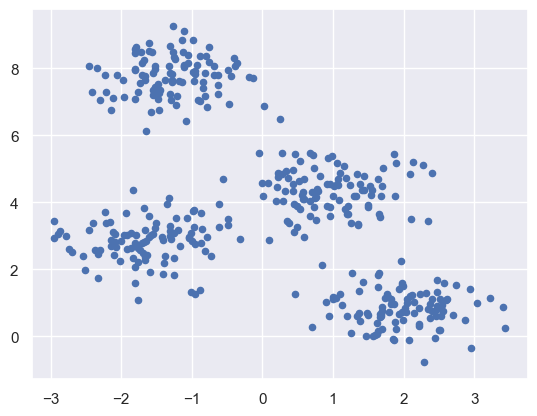

In [3]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

#generate 2D data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

#visualize dataset
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.show()

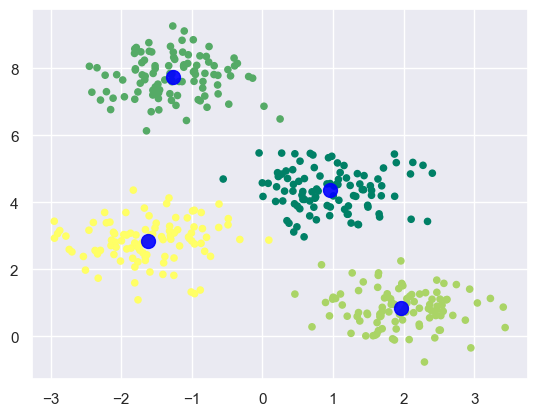

In [4]:
#make an object of KMeans along with providing number of clusters, train the model and do the prediction
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#plot and visualize the cluster’s centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()


# K-means clustering on simple digits dataset

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

#load the digit dataset from sklearn and make an object of it
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
#perform the clustering
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

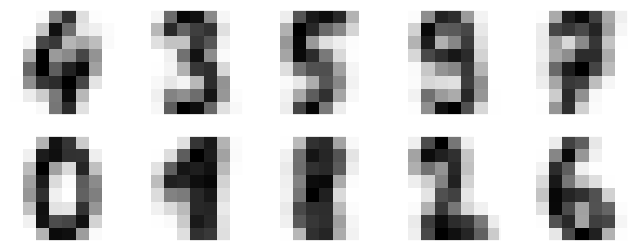

In [7]:
#show clusters centers
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
   axi.set(xticks=[], yticks=[])
   axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [8]:
#match the learned cluster labels with the true labels found
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]

C:\Users\POLINEMA\AppData\Local\Temp\ipykernel_20600\2130055407.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [9]:
#check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951